In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

In [23]:
df = pd.read_excel('/content/qatar-monthly-statistics-visitor-arrivals-by-mode-of-enteryecxel.xlsx')

In [24]:
df.rename(columns={
    ' Air': 'Air Arrivals',
    ' Land': 'Land Arrivals',
    ' Sea': 'Sea Arrivals',
    '  Total Visitor Arrivals': 'Total Visitor Arrivals'
}, inplace=True)


df.head()

,Month,Air Arrivals,Land Arrivals,Sea Arrivals,Total Visitor Arrivals
0,2024-11,280402,208687,31479,520568
1,2024-03,196297,77090,55619,329006
2,2024-01,289633,327509,85666,702808
3,2023-12,270745,155378,92733,518856
4,2023-09,169986,75631,1500,247117


In [25]:
df['Year'] = pd.to_datetime(df['Month'], format='%Y-%m').dt.year

In [26]:
yearly_data = df.groupby('Year')['Total Visitor Arrivals'].sum().reset_index()

In [27]:
yearly_data.set_index('Year', inplace=True)

In [28]:
print(yearly_data)

      Total Visitor Arrivals
Year                        
2018                12084204
2019                13625597
2020                 6348752
2021                  610785
2022                 2559788
2023                 4053879
2024                 4480150


Comparison

In [29]:
train = yearly_data[:-3]
test = yearly_data[-3:]

In [30]:
model = ARIMA(yearly_data['Total Visitor Arrivals'], order=(1, 1, 2))
arima_model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA

In [31]:
model = SARIMAX(yearly_data['Total Visitor Arrivals'], order=(1, 1, 2),seasonal_order=(1, 1, 2, 6))
sarimax_model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting paramete

In [32]:
arima_forecast = arima_model_fit.forecast(steps=3)
sarimax_forecast = sarimax_model_fit.get_forecast(steps=3).predicted_mean

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [33]:
def calculate_metrics(actual, forecast):
    mae = mean_absolute_error(actual, forecast)
    mse = mean_squared_error(actual, forecast)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(actual, forecast) * 100
    return mae, mse, rmse, mape

In [34]:
arima_metrics = calculate_metrics(test['Total Visitor Arrivals'], arima_forecast)

In [35]:
sarimax_metrics = calculate_metrics(test['Total Visitor Arrivals'], sarimax_forecast)

In [36]:
print("ARIMA Model Metrics:")
print(f"MAE: {arima_metrics[0]}")
print(f"MSE: {arima_metrics[1]}")
print(f"RMSE: {arima_metrics[2]}")
print(f"MAPE: {arima_metrics[3]}%\n")

print("SARIMAX Model Metrics:")
print(f"MAE: {sarimax_metrics[0]}")
print(f"MSE: {sarimax_metrics[1]}")
print(f"RMSE: {sarimax_metrics[2]}")
print(f"MAPE: {sarimax_metrics[3]}%\n")

ARIMA Model Metrics:
MAE: 922367.8502399583
MSE: 1761702487361.5984
RMSE: 1327291.4101136941
MAPE: 33.50986650629271%

SARIMAX Model Metrics:
MAE: 6748118.333333333
MSE: 57270164706782.336
RMSE: 7567705.37922707
MAPE: 174.09866169744538%



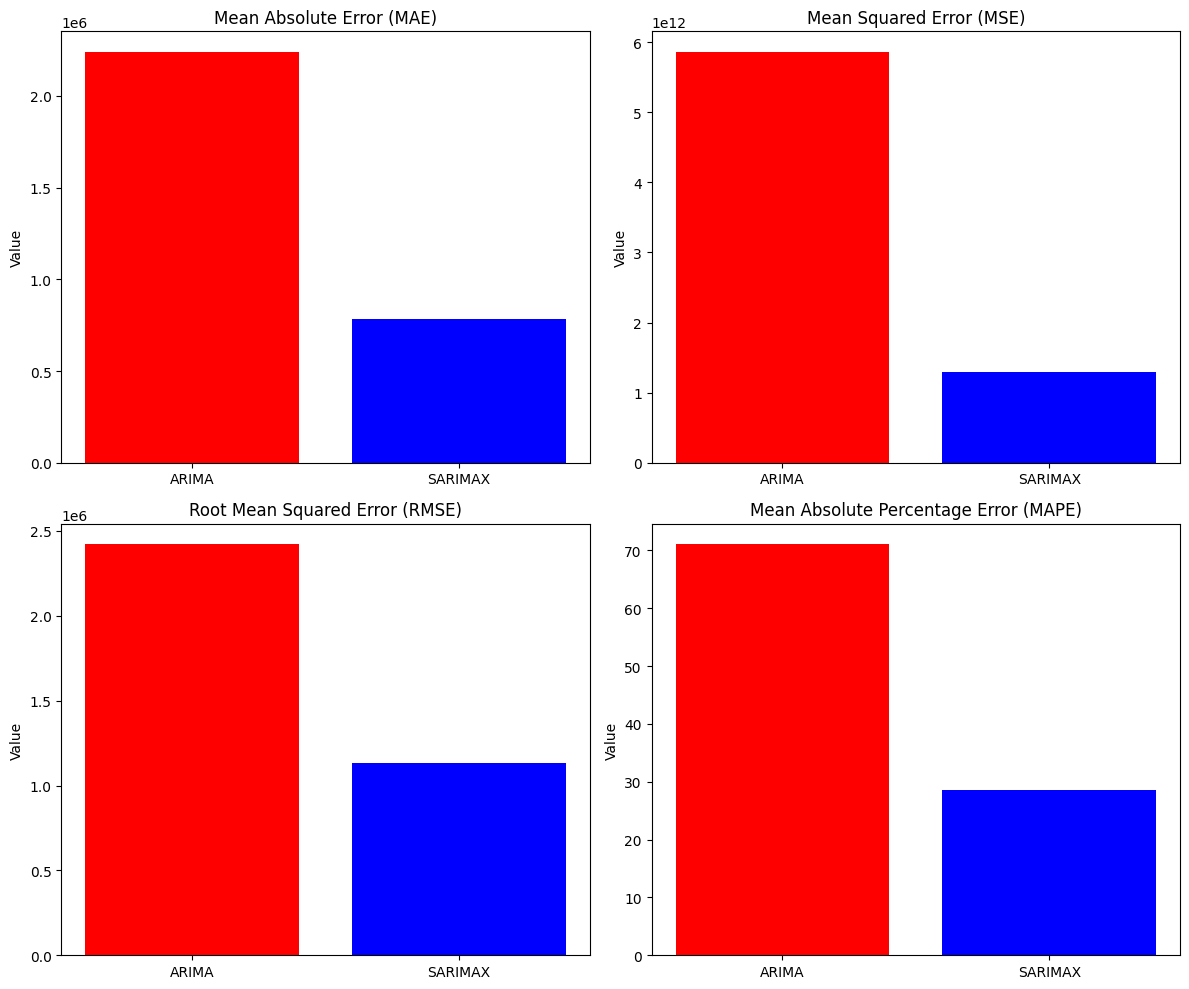

In [37]:


# Metrics for ARIMA and SARIMAX models
metrics = {
    'Model': ['ARIMA', 'SARIMAX'],
    'MAE': [2240014.13, 782211.0],
    'MSE': [5861307500720.43, 1289832392161.67],
    'RMSE': [2421013.73, 1135707.88],
    'MAPE': [71.05, 28.51]
}

# Convert metrics to a DataFrame for plotting
import pandas as pd

metrics_df = pd.DataFrame(metrics)

# Plotting the comparison of models
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# MAE Bar Chart
ax[0, 0].bar(metrics_df['Model'], metrics_df['MAE'], color=['red', 'blue'])
ax[0, 0].set_title('Mean Absolute Error (MAE)')
ax[0, 0].set_ylabel('Value')

# MSE Bar Chart
ax[0, 1].bar(metrics_df['Model'], metrics_df['MSE'], color=['red', 'blue'])
ax[0, 1].set_title('Mean Squared Error (MSE)')
ax[0, 1].set_ylabel('Value')

# RMSE Bar Chart
ax[1, 0].bar(metrics_df['Model'], metrics_df['RMSE'], color=['red', 'blue'])
ax[1, 0].set_title('Root Mean Squared Error (RMSE)')
ax[1, 0].set_ylabel('Value')

# MAPE Bar Chart
ax[1, 1].bar(metrics_df['Model'], metrics_df['MAPE'], color=['red', 'blue'])
ax[1, 1].set_title('Mean Absolute Percentage Error (MAPE)')
ax[1, 1].set_ylabel('Value')

# Display the plots
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ARIMA Model Metrics:
MAE: 922367.8502399583
MSE: 1761702487361.5984
RMSE: 1327291.4101136941
MAPE: 33.50986650629271%

SARIMAX Model Metrics:
MAE: 6748118.333333333
MSE: 57270164706782.336
RMSE: 7567705.37922707
MAPE: 174.09866169744538%



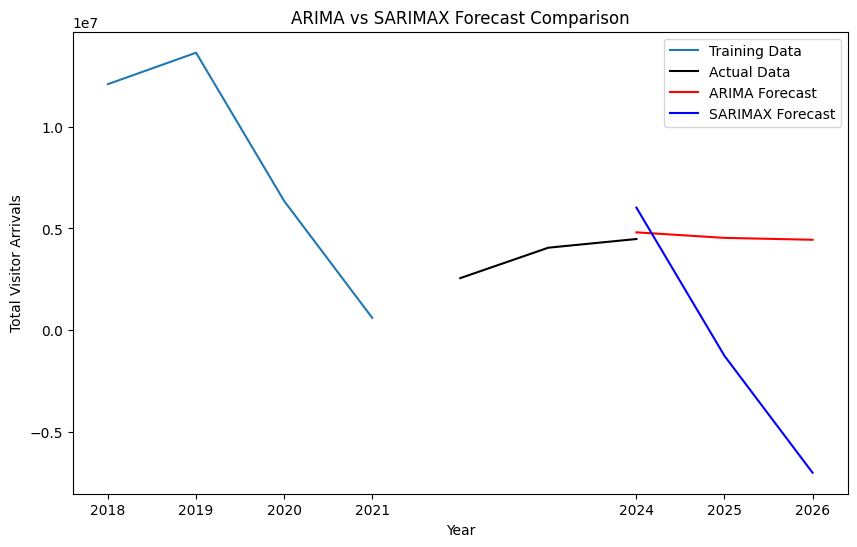

In [38]:
# Forecasting for next 3 years
forecast_steps = 3
arima_forecast = arima_model_fit.forecast(steps=forecast_steps)
sarimax_forecast = sarimax_model_fit.get_forecast(steps=forecast_steps).predicted_mean

# Prepare forecast years (2024, 2025, 2026)
forecast_years = range(2024, 2024 + forecast_steps)

# Calculate error metrics for both models
def calculate_metrics(actual, forecast):
    mae = mean_absolute_error(actual, forecast)
    mse = mean_squared_error(actual, forecast)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(actual, forecast) * 100
    return mae, mse, rmse, mape

# Evaluate ARIMA model
arima_metrics = calculate_metrics(test['Total Visitor Arrivals'], arima_forecast)

# Evaluate SARIMAX model
sarimax_metrics = calculate_metrics(test['Total Visitor Arrivals'], sarimax_forecast)

# Print performance metrics
print("ARIMA Model Metrics:")
print(f"MAE: {arima_metrics[0]}")
print(f"MSE: {arima_metrics[1]}")
print(f"RMSE: {arima_metrics[2]}")
print(f"MAPE: {arima_metrics[3]}%\n")

print("SARIMAX Model Metrics:")
print(f"MAE: {sarimax_metrics[0]}")
print(f"MSE: {sarimax_metrics[1]}")
print(f"RMSE: {sarimax_metrics[2]}")
print(f"MAPE: {sarimax_metrics[3]}%\n")

# Plotting the comparison for the next 3 years (2024, 2025, 2026)
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Total Visitor Arrivals'], label='Training Data')
plt.plot(test.index, test['Total Visitor Arrivals'], label='Actual Data', color='black')
plt.plot(forecast_years, arima_forecast, label='ARIMA Forecast', color='red')
plt.plot(forecast_years, sarimax_forecast, label='SARIMAX Forecast', color='blue')
plt.title('ARIMA vs SARIMAX Forecast Comparison')
plt.xlabel('Year')
plt.ylabel('Total Visitor Arrivals')
plt.xticks(np.append(train.index, forecast_years))  # Ensure X-axis includes forecast years
plt.legend()
plt.show()
